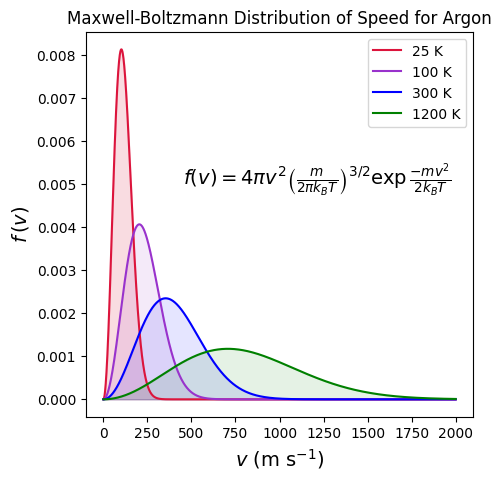

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m_Ar = 39.948/(6.02e23)/1000  # mass of Ar in kg per molecule
kB = 1.3806503e-23  # in J/K

# Temperatures
temperatures = [25, 100, 300, 1200]  # in Kelvin

# Maxwell-Boltzmann speed distribution function
def f(m, T, v):
    return 4 * np.pi * v**2 * (m / (2 * np.pi * kB * T))**1.5 * np.exp(-m * v**2 / (2 * kB * T))

# Velocity
v = np.arange(0.0, 2000, 0.01)

# Plotting
plt.figure(figsize=(5, 5))
plt.text(450, 0.005, r'$f(v) = 4\pi v^{2}\left(\frac{m}{2 \pi k_{B} T}\right)^{3/2} \exp{\frac{-mv^{2}}{2k_{B}T}}$', fontsize=14)
colors = ['crimson', 'darkorchid', 'blue', 'green']
alphas = [0.15, 0.1, 0.1, 0.1]

for temp, color, alpha in zip(temperatures, colors, alphas):
    distribution = f(m_Ar, temp, v)
    plt.plot(v, distribution, color=color, label=f'{temp} K')
    plt.fill_between(v, distribution, alpha=alpha, color=color)

plt.xlabel('$v$ (m $\mathrm{s}^{-1}$)', fontsize=14)
plt.ylabel('$f\,(v)$', fontsize=14)
plt.title('Maxwell-Boltzmann Distribution of Speed for Argon')
plt.legend()
plt.show()


Fraction of molecules with speeds between 250 and 500 m/s is 0.54.


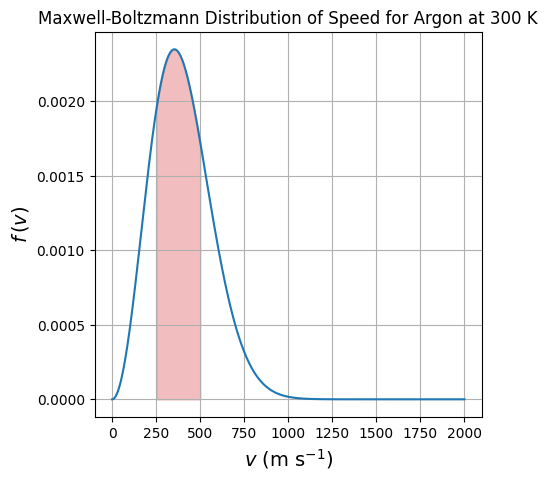

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
m_Ar = 39.948/(6.02e23)/1000  # mass of Ar in kg per molecule
kB = 1.3806503e-23  # in J/K

# Temperatures
T = 300  # in K

# Maxwell-Boltzmann speed distribution function
def f(v, m, T):
    return 4 * np.pi * v**2 * (m / (2 * np.pi * kB * T))**1.5 * np.exp(-m * v**2 / (2 * kB * T))

# Specify the speed range
v_min = 250
v_max = 500

# Calculate the fraction of molecules in the specified speed range
fraction, _ = quad(f, v_min, v_max, args=(m_Ar, T))
print(f"Fraction of molecules with speeds between 250 and 500 m/s is {fraction:0.2f}.")

# Speed for plotting
v = np.arange(0.0, 2000, 0.01)

# Plot the Maxwell-Boltzmann distribution
plt.figure(figsize=(5,5))
plt.plot(v, f(v, m_Ar, T), color="tab:blue")
v_fill = np.linspace(v_min, v_max, 500)
f_fill = f(v_fill, m_Ar, T)
plt.fill_between(v_fill, f_fill, color='tab:red', alpha=0.3)
plt.xlabel('$v$ (m $\mathrm{s}^{-1}$)', fontsize=14)
plt.ylabel('$f\,(v)$', fontsize=14)
plt.title('Maxwell-Boltzmann Distribution of Speed for Argon at 300 K')
plt.grid(True)
plt.show();